<a href="https://colab.research.google.com/github/Balajivasudevan03/Walmart_case_study/blob/main/Copy_of_Walmart_data_final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from scipy.stats import norm
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [ ]:
df = pd.read_csv("/content/walmart_data.csv")

In [ ]:
df1 = df.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df1.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
df1.shape

(550068, 10)

In [ ]:
df1.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
106013,1004327,P00127442,M,36-45,17,B,1,0,1,11538
280601,1001258,P00367942,M,46-50,7,C,1,0,5,8852
100258,1003532,P00136742,F,36-45,14,B,1,0,1,15548
304780,1004946,P00210042,F,36-45,1,B,1,0,8,8142
104013,1004026,P00150542,M,26-35,7,C,2,0,5,5447
190909,1005504,P00114042,M,46-50,7,B,1,1,5,7158
310580,1005858,P00254342,M,26-35,4,B,1,0,5,5263
522908,1002537,P00104842,M,36-45,11,B,0,0,8,6196
81344,1000549,P00221342,M,26-35,6,A,3,0,1,11797
446535,1002796,P00287942,M,26-35,14,B,3,0,8,4023


In [ ]:
df1[df1.isnull().all(axis=1)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [ ]:
df1[df1.isnull().any(axis=1)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [ ]:
df1.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
for i in df1.columns:
  print(i, ":", df1[i].unique())
  print("_"*50)

User_ID : [1000001 1000002 1000003 ... 1004113 1005391 1001529]
__________________________________________________
Product_ID : ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
__________________________________________________
Gender : ['F' 'M']
__________________________________________________
Age : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
__________________________________________________
Occupation : [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
__________________________________________________
City_Category : ['A' 'C' 'B']
__________________________________________________
Stay_In_Current_City_Years : ['2' '4+' '3' '1' '0']
__________________________________________________
Marital_Status : [0 1]
__________________________________________________
Product_Category : [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
__________________________________________________
Purchase : [ 8370 15200  1422 ...   135  

In [ ]:
for i in df1.columns:
  print(i, ":", df1[i].nunique())
  print("_"*50)

User_ID : 5891
__________________________________________________
Product_ID : 3631
__________________________________________________
Gender : 2
__________________________________________________
Age : 7
__________________________________________________
Occupation : 21
__________________________________________________
City_Category : 3
__________________________________________________
Stay_In_Current_City_Years : 5
__________________________________________________
Marital_Status : 2
__________________________________________________
Product_Category : 20
__________________________________________________
Purchase : 18105
__________________________________________________


In [ ]:
df1[df1["Stay_In_Current_City_Years"].str.endswith("+")].shape

(84726, 10)

In [ ]:
df1[df1["Stay_In_Current_City_Years"].str.contains("4+")].shape

(84726, 10)

In [ ]:
df1["Stay_In_Current_City_Years"].replace(["4+"],[4],inplace=True)

In [ ]:
df1[df1["Stay_In_Current_City_Years"]=="4+"]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [ ]:
df1[df1["Stay_In_Current_City_Years"]==4].shape

(84726, 10)

In [ ]:
df1["Stay_In_Current_City_Years"] = df1["Stay_In_Current_City_Years"].astype(int)

In [ ]:
df1.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
df1.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df1.describe()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,1.858418,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,1.289443,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,2.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,3.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,4.000000,1.000000,20.000000,23961.000000


In [ ]:
Male_data = df1[df1["Gender"]=="M"]
Female_data = df1[df1["Gender"]=="F"]

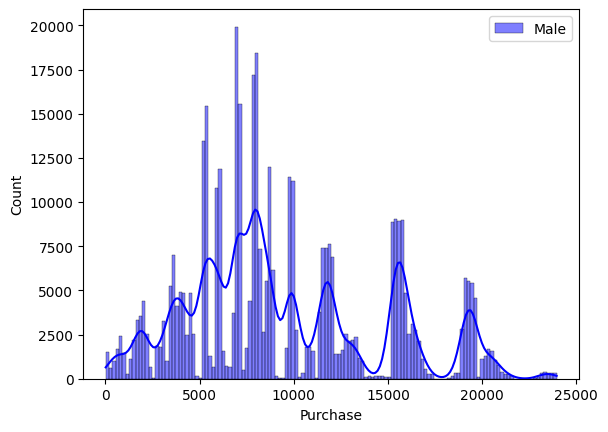

In [ ]:
sns.histplot(Male_data["Purchase"],color="blue",label="Male",kde=True)
plt.legend()
plt.show()

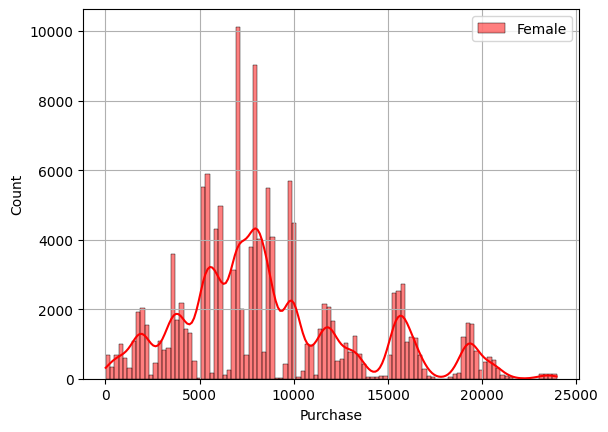

In [ ]:
plt.grid()
sns.histplot(Female_data["Purchase"],color="red",label="Female",kde=True)
plt.legend()
plt.show()

In [ ]:
male_data = df1[df1["Gender"]=="M"]
male_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


In [ ]:
size = len(df1[df1["Gender"]=="M"]["Purchase"])
iteration = 1000
msd_full_male = np.empty(iteration)
full_male_sample_data = male_data["Purchase"]
for i in range(iteration):
  random_sample = np.random.choice(full_male_sample_data,size=size)
  msd_full_male[i] = np.mean(random_sample)



In [ ]:
msd_full_male

array([9457.6003732 , 9425.42237103, 9443.94993953, 9444.01599241,
       9431.58755513, 9445.38113354, 9435.70744148, 9431.50934319,
       9444.97136091, 9441.97562877, 9455.27168269, 9441.27337004,
       9441.00994305, 9425.54006551, 9438.34241863, 9449.74828549,
       9433.26479811, 9427.72023058, 9440.1037491 , 9418.52018665,
       9444.56555923, 9445.30849058, 9421.10307803, 9436.11256243,
       9441.88784794, 9432.78581998, 9438.87017059, 9441.0692055 ,
       9425.33972949, 9435.24046309, 9446.22101149, 9435.58407904,
       9435.01466232, 9430.74214682, 9440.33697035, 9438.99660357,
       9441.89606985, 9433.90183436, 9444.68727052, 9441.72031748,
       9433.01868638, 9431.42291175, 9449.66614847, 9445.09473059,
       9446.70613553, 9432.89640539, 9433.248096  , 9444.116053  ,
       9430.21134846, 9435.60789023, 9419.32351983, 9426.86926295,
       9435.72711275, 9443.63941399, 9435.41598613, 9436.48311564,
       9438.43180474, 9417.95972085, 9433.28297756, 9418.06948

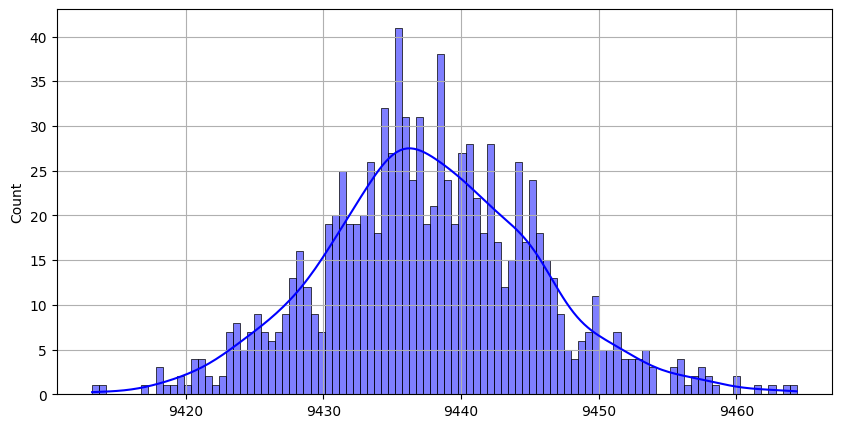

In [ ]:
plt.figure(figsize=(10,5))
plt.grid()
sns.histplot(msd_full_male,kde=True,color="blue",bins=100)
plt.show()

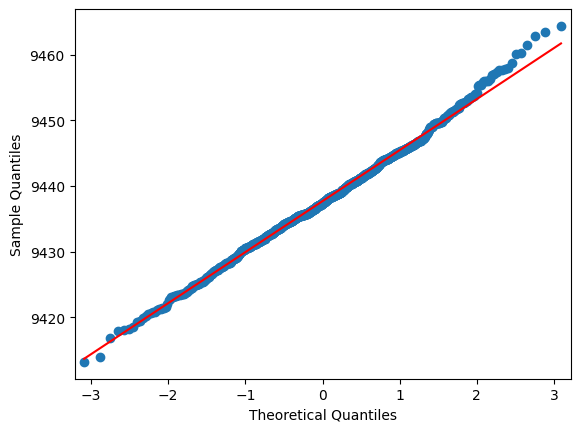

In [ ]:
qqplot(msd_full_male,line="s")
plt.show()

In [ ]:
#calculating mean and standard deviation
[msd_full_male.mean(), msd_full_male.std()]

[9437.694051844379, 7.772012559581634]

In [ ]:
##2.5th percentile and 97.5 percentile
print(np.percentile(msd_full_male,97.5))
print(np.percentile(msd_full_male,2.5))

9453.623598582046
9423.15249403151


In [ ]:
# 95 % confidence interval as it follows normal distribution
print(np.mean(msd_full_male)+(1.96)*np.std(msd_full_male))
print(np.mean(msd_full_male)-(1.96)*np.std(msd_full_male))

9452.927196461158
9422.4609072276


### Confidence interval for sample size 300 on male..

In [ ]:
iteration = 1000
size = 300 # sample_size
male_sample_data = male_data["Purchase"]
msd_male = np.empty(iteration)
for i in range(iteration):
  random_sample = np.random.choice(male_sample_data,size=size)
  msd_male[i] = np.mean(random_sample)

In [ ]:
msd_male

array([10341.69333333, 10089.92      ,  9062.97666667,  9351.52333333,
        9152.74666667,  9495.84333333,  9512.20333333,  9442.35666667,
        9341.2       ,  9346.04333333,  9618.22666667,  9510.93      ,
        9528.02      ,  8784.13333333,  9551.78333333,  9531.86666667,
        9251.55333333,  9511.14333333,  9336.06333333,  9518.28666667,
        9653.96666667,  9585.42333333,  9581.28      ,  9405.80666667,
        9826.09666667,  9211.12333333,  9439.06      ,  9537.07666667,
       10130.98333333,  9324.40333333,  9553.15333333,  9622.48666667,
        9634.23333333,  9419.14      ,  8801.84666667,  9550.06333333,
        9438.34      ,  9942.90666667,  9530.54      ,  9913.30333333,
        9065.44      ,  9451.06333333,  9526.62666667,  9838.57666667,
        9788.59666667,  9441.76666667,  9167.97666667,  9769.49666667,
        9016.44333333,  9452.74      ,  9537.15666667,  9771.19666667,
        9506.92      ,  9383.58      ,  9304.07666667,  9545.43      ,
      

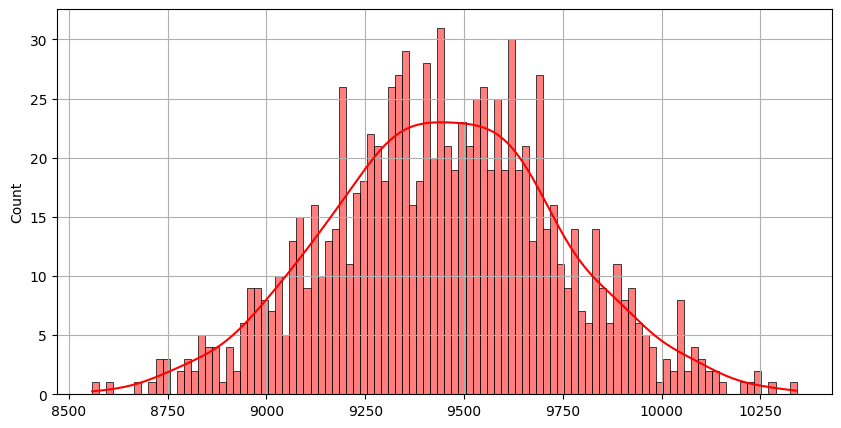

In [ ]:
plt.figure(figsize=(10,5))
plt.grid()
sns.histplot(msd_male,kde=True,color="red",bins=100)
plt.show()

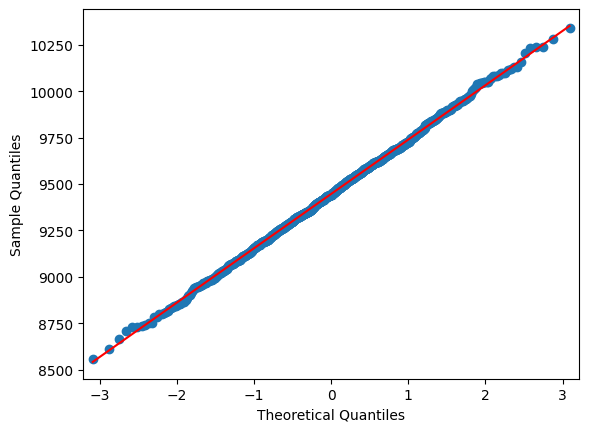

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(msd_male,line="s")
plt.show()

In [ ]:
#calculating mean and standard deviation
[msd_male.mean(), msd_male.std()]

[9446.660846666668, 293.01212712001234]

In [ ]:
##2.5th percentile and 97.5 percentile
print(np.percentile(msd_male,97.5))
print(np.percentile(msd_male,2.5))

10046.035750000001
8858.079833333333


In [ ]:
# 95 % confidence interval as it follows normal distribution
print(np.mean(msd_male)+(1.96)*np.std(msd_male))
print(np.mean(msd_male)-(1.96)*np.std(msd_male))

10020.964615821891
8872.357077511444


In [ ]:
#np.std(msd_male)

In [ ]:
#C =df1[df1["Gender"]=="M"]["Purchase"]

In [ ]:
#sigma = C.std()/np.sqrt(300)

In [ ]:
#mu = np.mean(msd_male) + ((-1.96)*sigma)
#mu

In [ ]:
#mu = np.mean(msd_male) + ((1.96)*sigma)
#mu

In [ ]:
#norm.ppf(0.025)

### Confidence interval for sample size 30K on male_data

In [ ]:
size = 30000 # sample_size
iteration = 1000
male_sample_data_30000 = male_data["Purchase"]
msd_male_30000 = np.empty(iteration)
for i in range(iteration):
  random_sample = np.random.choice(male_sample_data_30000,size=size)
  msd_male_30000[i] = np.mean(random_sample)

In [ ]:
msd_male_30000

array([9457.9212    , 9385.90906667, 9436.6858    , 9410.13926667,
       9470.7458    , 9455.8537    , 9453.11703333, 9466.88666667,
       9433.4248    , 9437.53983333, 9407.19576667, 9411.24403333,
       9453.071     , 9411.0643    , 9461.68263333, 9449.07263333,
       9378.95433333, 9388.89393333, 9489.09833333, 9446.92976667,
       9443.05976667, 9449.16386667, 9419.099     , 9458.78333333,
       9420.12203333, 9470.5703    , 9450.57596667, 9435.35726667,
       9447.95923333, 9463.01956667, 9435.1883    , 9432.46126667,
       9408.43106667, 9471.89793333, 9371.79166667, 9443.10606667,
       9419.9536    , 9394.86003333, 9461.17066667, 9421.5103    ,
       9393.08693333, 9434.8011    , 9463.76436667, 9412.4882    ,
       9482.36333333, 9467.18573333, 9451.43383333, 9465.4729    ,
       9493.7011    , 9448.56633333, 9496.48846667, 9453.04843333,
       9410.80613333, 9453.97103333, 9388.7119    , 9421.4486    ,
       9400.1563    , 9432.99696667, 9446.51143333, 9438.5959 

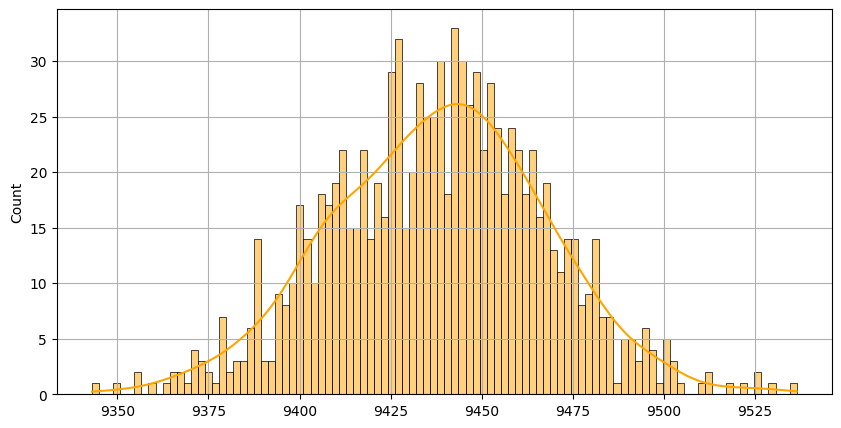

In [ ]:
plt.figure(figsize=(10,5))
plt.grid()
sns.histplot(msd_male_30000,kde=True,color="orange",bins=100)
plt.show()

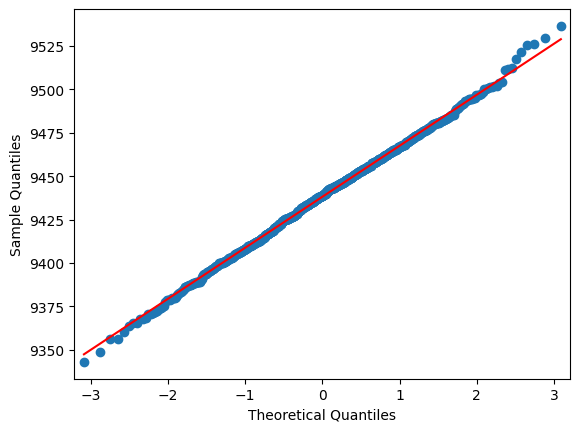

In [ ]:
qqplot(msd_male_30000,line="s")
plt.show()

In [ ]:
#calculating mean and standard deviation
[msd_male_30000.mean(), msd_male_30000.std()]

[9438.1329404, 29.345283233276554]

In [ ]:
##2.5th percentile and 97.5 percentile
print(np.percentile(msd_male_30000,97.5))
print(np.percentile(msd_male_30000,2.5))

9494.5919
9379.644244166668


In [ ]:
# 95 % confidence interval as it follows normal distribution
print(np.mean(msd_male_30000)+(1.96)*np.std(msd_male_30000))
print(np.mean(msd_male_30000)-(1.96)*np.std(msd_male_30000))

9495.649695537222
9380.61618526278


Based on the provided confidence intervals (CIs) for the population and samples, let's address each of the questions:

### i. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?

Given:
- Population CI: [9422.4609072276, 9452.927196461158]
- Sample of 300 CI: [8872.357077511444, 10020.964615821891]
- Sample of 30,000 CI: [9380.61618526278, 9495.649695537222]

The population CI is narrower than the sample of 300 CI but slightly wider than the sample of 30,000 CI. The entire dataset CI should be representative of the overall population variance. Without specific CIs for different genders, we can't definitively say if one gender's CI is wider. However, generally, differences in CI widths could arise due to varying sample sizes, variances, or population distributions between genders.

### ii. How is the width of the confidence interval affected by the sample size?
The width of the confidence interval is inversely related to the sample size. As the sample size increases, the width of the confidence interval generally decreases. This is due to the fact that larger sample sizes provide more information about the population parameter, leading to more precise estimates and narrower confidence intervals.

From the provided data:
- Sample of 300: Width = 10020.964615821891 - 8872.357077511444 = 1148.607538310447
- Sample of 30,000: Width = 9495.649695537222 - 9380.61618526278 = 115.033510274442
- Population: Width = 9452.927196461158 - 9422.4609072276 = 30.466289233558

This clearly shows that as the sample size increases, the CI width decreases significantly.

### iii. Do the confidence intervals for different sample sizes overlap?
To check for overlap between the confidence intervals, we compare the intervals:

- Population CI: [9422.4609072276, 9452.927196461158]
- Sample of 300 CI: [8872.357077511444, 10020.964615821891]
- Sample of 30,000 CI: [9380.61618526278, 9495.649695537222]

Overlap between:
- Population and sample of 300: Yes, they overlap. (9422.4609072276 to 9452.927196461158 is within 8872.357077511444 to 10020.964615821891)
- Population and sample of 30,000: Yes, they overlap. (9422.4609072276 to 9452.927196461158 is within 9380.61618526278 to 9495.649695537222)
- Sample of 300 and sample of 30,000: Yes, they overlap. (9380.61618526278 to 9495.649695537222 is within 8872.357077511444 to 10020.964615821891)

All provided confidence intervals overlap with each other.

### iv. How does the sample size affect the shape of the distributions of the means?
As the sample size increases, the distribution of the sample means tends to become more normally distributed due to the Central Limit Theorem (CLT). The larger the sample size:
1. The mean of the sample means will approach the population mean.
2. The standard error (the standard deviation of the sampling distribution of the sample mean) decreases, making the distribution of sample means narrower and more concentrated around the population mean.
3. The shape of the distribution of the sample means becomes more bell-shaped and symmetric, closely resembling a normal distribution, regardless of the shape of the population distribution.

In summary, increasing the sample size leads to a more precise estimate of the population mean, narrower confidence intervals, and a more normally distributed shape of the sample means.

# Gender==female, data confidence interval

### for whole lot female data confidence interval..

In [ ]:
female_data = df1[df1["Gender"]=="F"]

In [ ]:
iteration = 1000
size = len(female_data["Purchase"]) # sample_size
female_sample_data = female_data["Purchase"]
msd_female = np.empty(iteration)
for i in range(iteration):
  random_sample = np.random.choice(female_sample_data,size=size)
  msd_female[i] = np.mean(random_sample)


In [ ]:
msd_female

array([8715.20148886, 8737.59070459, 8715.72498141, 8731.18140182,
       8737.62935446, 8745.91684645, 8728.75511196, 8739.56301865,
       8739.50441429, 8735.42922781, 8736.68164113, 8728.06974501,
       8748.05607876, 8730.56522764, 8713.05307454, 8732.06155704,
       8698.52590771, 8716.77519899, 8738.26669808, 8743.18243268,
       8724.759876  , 8725.06088698, 8736.62033444, 8735.63295511,
       8742.48888513, 8746.6611123 , 8725.26850209, 8718.82606455,
       8745.01357053, 8754.47205266, 8731.66883638, 8745.84240367,
       8734.15965069, 8725.01418904, 8722.26796457, 8737.99878506,
       8735.98909498, 8704.22333571, 8746.75063508, 8721.6487788 ,
       8752.80030042, 8752.52569417, 8741.35189126, 8745.68671443,
       8739.52716683, 8734.70408441, 8724.6006892 , 8742.7190466 ,
       8751.83641732, 8739.38401726, 8721.37512241, 8744.14513029,
       8733.32037641, 8717.04889956, 8741.55231244, 8750.3460669 ,
       8731.17720475, 8750.39581324, 8737.48621225, 8760.27565

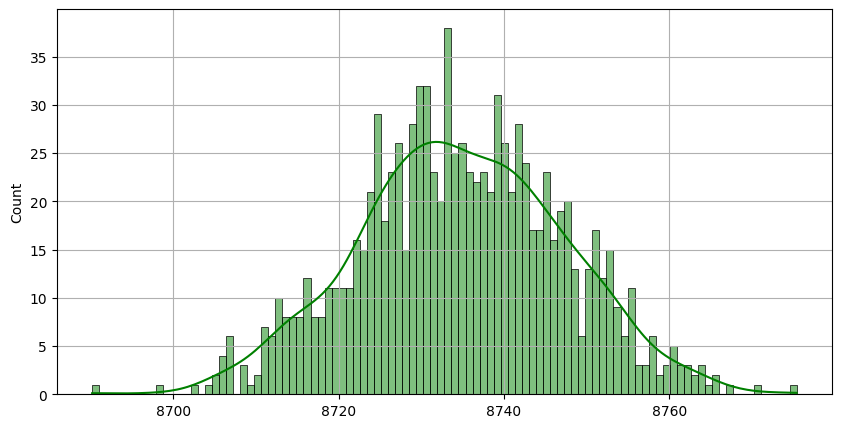

In [ ]:
plt.figure(figsize=(10,5))
plt.grid()
sns.histplot(msd_female,kde=True,color="green",bins=100)
plt.show()

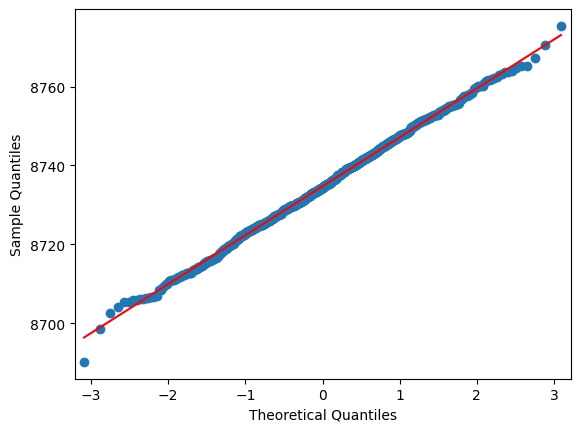

In [ ]:
qqplot(msd_female,line="s")
plt.show()

In [ ]:
#calculating mean and standard deviation
[msd_female.mean(), msd_female.std()]

[8734.730200877704, 12.407191018439242]

In [ ]:
##2.5th percentile and 97.5 percentile
print(np.percentile(msd_female,97.5))
print(np.percentile(msd_female,2.5))

8758.523212563234
8711.05463150454


In [ ]:
# 95 % confidence interval as it follows normal distribution
print(np.mean(msd_female)+(1.96)*np.std(msd_female))
print(np.mean(msd_female)-(1.96)*np.std(msd_female))

8759.048295273846
8710.412106481563


### female Confidence interval for sample size 300

In [ ]:
iteration = 1000
size = 300 # sample_size
msd_female_300 = np.empty(iteration)
msd_female_sample_data_300 = female_data["Purchase"]
for i in range(iteration):
  random_sample = np.random.choice(msd_female_sample_data_300,size=size)
  msd_female_300[i] = np.mean(random_sample)

In [ ]:
msd_female_300

array([8883.72      , 8996.81666667, 8607.11666667, 9024.83333333,
       9374.28      , 7865.61      , 8992.4       , 8421.36666667,
       8642.2       , 8911.78666667, 8340.13333333, 8901.71666667,
       8456.57666667, 8823.02666667, 9153.        , 8646.78666667,
       8613.71      , 8330.85333333, 8554.07333333, 8759.04666667,
       8598.1       , 8848.72333333, 8609.47666667, 8443.25      ,
       8487.89333333, 8477.78333333, 8680.71666667, 9147.02      ,
       9193.15666667, 8802.46666667, 9095.59333333, 7890.26333333,
       8201.32      , 8865.86666667, 8374.60333333, 8205.58333333,
       8068.52666667, 8649.93333333, 8591.15      , 8125.49333333,
       8654.32666667, 8539.97666667, 8796.76      , 8932.21666667,
       8739.30333333, 8542.43333333, 8427.13666667, 9151.38      ,
       8537.68      , 8473.72666667, 8524.86      , 9228.50333333,
       8996.62333333, 8151.26      , 8664.88333333, 8303.03      ,
       8543.28666667, 8820.49      , 8685.42333333, 8499.89   

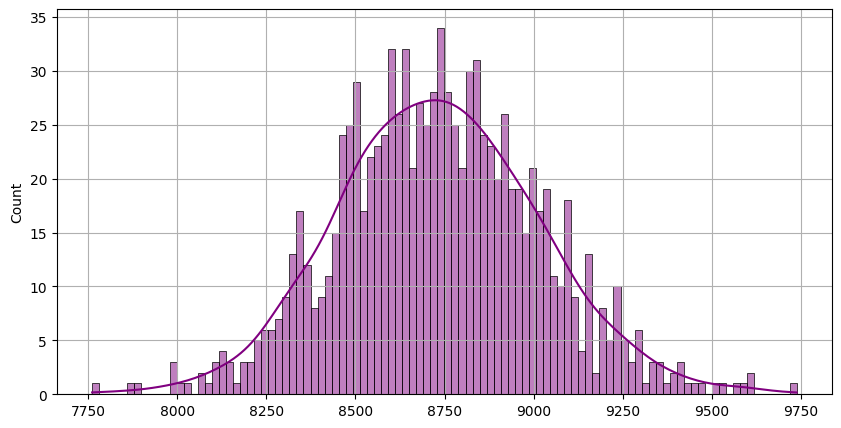

In [ ]:
plt.figure(figsize=(10,5))
plt.grid()
sns.histplot(msd_female_300,kde=True,color="purple",bins=100)
plt.show()

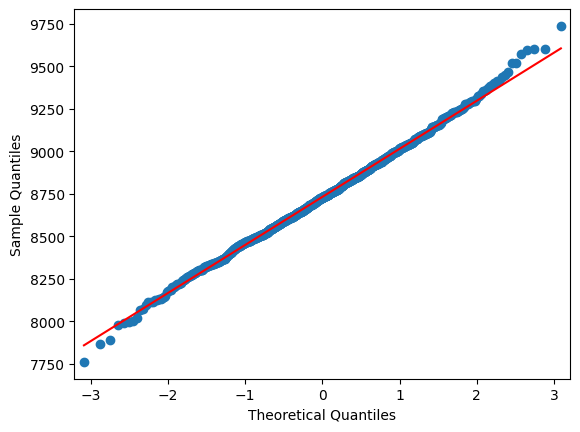

In [ ]:
qqplot(msd_female_300,line="s")
plt.show()

In [ ]:
#calculating mean and standard deviation
[msd_female_300.mean(), msd_female_300.std()]

[8732.338083333334, 282.7138677338779]

In [ ]:
##2.5th percentile and 97.5 percentile
print(np.percentile(msd_female_300,97.5))
print(np.percentile(msd_female_300,2.5))

9296.258916666668
8200.304583333334


In [ ]:
# 95 % confidence interval as it follows normal distribution
print(np.mean(msd_female_300)+(1.96)*np.std(msd_female_300))
print(np.mean(msd_female_300)-(1.96)*np.std(msd_female_300))

9286.457264091734
8178.218902574933


### female Confidence interval for sample size 30000

In [ ]:
size = 30000 # sample_size
iteration = 1000
msd_female_30000 = np.empty(iteration)
msd_female_sample_data_30000 = female_data["Purchase"]
for i in range(iteration):
  random_sample = np.random.choice(msd_female_sample_data_30000,size=size)
  msd_female_30000[i] = np.mean(random_sample)

In [ ]:
msd_female_30000

array([8772.05116667, 8757.4967    , 8674.60933333, 8734.09766667,
       8737.4189    , 8746.74133333, 8732.864     , 8743.91663333,
       8720.83343333, 8722.11986667, 8723.1915    , 8714.44006667,
       8716.00056667, 8723.47796667, 8732.0825    , 8733.4973    ,
       8746.36516667, 8675.67506667, 8717.39533333, 8712.01623333,
       8768.36523333, 8784.26433333, 8770.25446667, 8758.02733333,
       8722.88006667, 8706.3716    , 8762.742     , 8720.33056667,
       8676.459     , 8707.96106667, 8772.82326667, 8713.0855    ,
       8775.99233333, 8712.0635    , 8757.23926667, 8731.60726667,
       8718.0328    , 8776.5006    , 8739.3784    , 8754.9079    ,
       8751.85946667, 8767.27563333, 8723.5981    , 8724.51663333,
       8763.37916667, 8767.1015    , 8777.19393333, 8748.36196667,
       8717.11036667, 8761.67816667, 8737.07916667, 8733.53543333,
       8732.9165    , 8761.69353333, 8672.32856667, 8702.04323333,
       8740.91413333, 8758.06356667, 8698.8459    , 8762.3035 

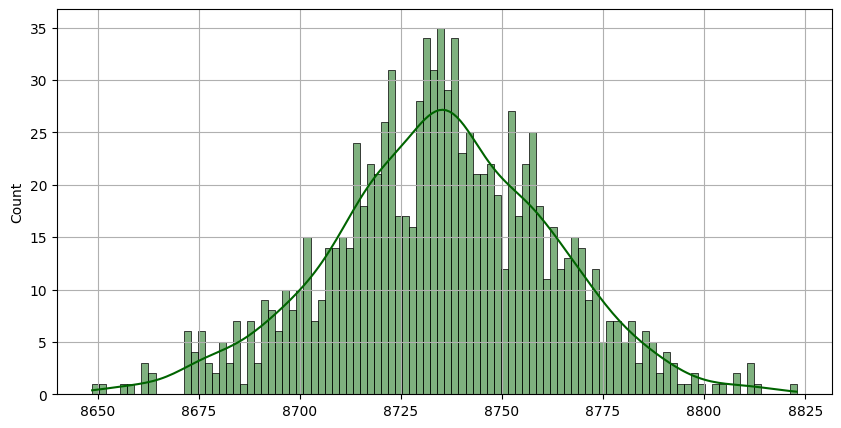

In [ ]:
plt.figure(figsize=(10,5))
plt.grid()
sns.histplot(msd_female_30000,kde=True,color="darkgreen",bins=100)
plt.show()

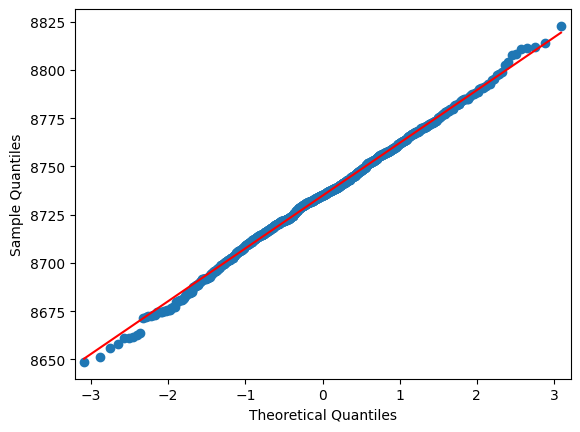

In [ ]:
qqplot(msd_female_30000,line="s")
plt.show()

In [ ]:
#calculating mean and standard deviation
[msd_female_30000.mean(), msd_female_30000.std()]

[8734.881587466667, 27.351844886002684]

In [ ]:
##2.5th percentile and 97.5 percentile
print(np.percentile(msd_female_30000,97.5))
print(np.percentile(msd_female_30000,2.5))

8787.4235075
8676.953195


In [ ]:
# 95 % confidence interval as it follows normal distribution
print(np.mean(msd_female_30000)+(1.96)*np.std(msd_female_30000))
print(np.mean(msd_female_30000)-(1.96)*np.std(msd_female_30000))

8788.491203443233
8681.271971490101


Let's analyze the provided confidence intervals to answer the questions:

1. **Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?**

    - Lower bound: 8710.412106481563
    - Upper bound: 8759.048295273846
    
The population CI is narrower than the sample of 300 CI but slightly wider than the sample of 30,000 CI. The entire dataset CI should be representative of the overall population variance. Without specific CIs for different genders, we can't definitively say if one gender's CI is wider. However, generally, differences in CI widths could arise due to varying sample sizes, variances, or population distributions between genders.

2. **How is the width of the confidence interval affected by the sample size?**

    To see how the width changes with sample size, we calculate the width of each confidence interval:
    - Entire dataset: \( 8759.048295273846 - 8710.412106481563 = 48.636188792283 \)
    - Sample of 300: \( 9286.457264091734 - 8178.218902574933 = 1108.238361516801 \)
    - Sample of 30,000: \( 8788.491203443233 - 8681.271971490101 = 107.219231953132 \)

    **Observation**: As the sample size increases, the width of the confidence interval decreases. This happens because larger sample sizes provide more information about the population, leading to more precise estimates (smaller standard errors) and thus narrower confidence intervals.

3. **Do the confidence intervals for different sample sizes overlap?**

    Let's check if the ranges of the confidence intervals overlap:

    - Entire dataset: 8710.412106481563 to 8759.048295273846
    - Sample of 300: 8178.218902574933 to 9286.457264091734
    - Sample of 30,000: 8681.271971490101 to 8788.491203443233

    **Observation**:
    - The interval for the entire dataset (8710.4121 to 8759.0483) overlaps with the interval for the sample of 30,000 (8681.2720 to 8788.4912).
    - Both these intervals also overlap with the interval for the sample of 300 (8178.2189 to 9286.4573).

    Therefore, the confidence intervals for different sample sizes do overlap.

4. **How does the sample size affect the shape of the distributions of the means?**

    As the sample size increases:
    - The sampling distribution of the sample mean becomes approximately normal due to the Central Limit Theorem (CLT), regardless of the shape of the population distribution.
    - The standard error of the mean decreases, making the distribution of the sample mean narrower and more concentrated around the true population mean.

    **Observation**: Larger sample sizes lead to a more normal distribution of the sample mean with a smaller spread (standard deviation), resulting in more precise estimates of the population mean.

# Confidence interval on marital status

In [ ]:
married_data = df1[df1["Marital_Status"]==1]
unmarried_data = df1[df1["Marital_Status"]==0]

In [ ]:
def confidence_interval(data):
  iteration = 1000
  size = 30000 # sample_size
  msd = np.empty(iteration)
  for i in range(iteration):
    random_sample = np.random.choice(data,size=size)
    msd[i] = np.mean(random_sample)
  return msd

In [ ]:
married_data_msd = confidence_interval(married_data["Purchase"])
married_data_msd
#unmarried_data_msd = confidence_interval(unmarried_data["Purchase"])

array([9245.21053333, 9245.17673333, 9245.02243333, 9239.2123    ,
       9227.45306667, 9210.10003333, 9304.3047    , 9235.5771    ,
       9224.0949    , 9263.52026667, 9287.00256667, 9241.6805    ,
       9243.02506667, 9198.2327    , 9198.90786667, 9282.68823333,
       9283.0656    , 9263.19506667, 9282.59153333, 9219.08346667,
       9290.51986667, 9269.70853333, 9243.3034    , 9295.7664    ,
       9290.90273333, 9263.41703333, 9259.4326    , 9289.675     ,
       9254.61766667, 9188.91013333, 9222.87156667, 9252.06783333,
       9281.4403    , 9212.13496667, 9277.03913333, 9259.672     ,
       9270.06393333, 9236.6032    , 9277.0464    , 9219.53443333,
       9286.62936667, 9249.83893333, 9253.01473333, 9226.55356667,
       9250.9923    , 9295.9606    , 9255.00406667, 9301.63673333,
       9238.1405    , 9311.1817    , 9256.66583333, 9266.7826    ,
       9266.9627    , 9276.02626667, 9237.40553333, 9298.63586667,
       9271.53623333, 9242.0104    , 9277.6313    , 9277.25486

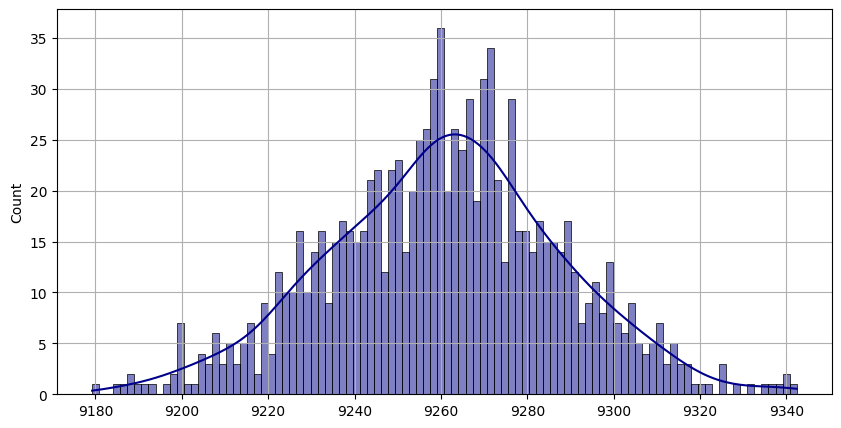

In [ ]:
plt.figure(figsize=(10,5))
plt.grid()
sns.histplot(married_data_msd,kde=True,color="darkblue",bins=100)
plt.show()

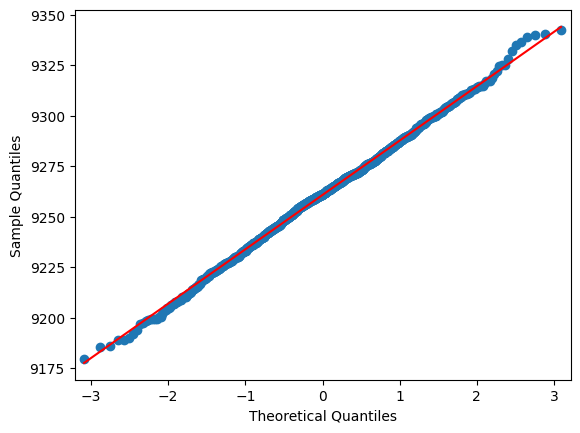

In [ ]:
qqplot(married_data_msd,line="s")
plt.show()

In [ ]:
#calculating mean and standard deviation
[married_data_msd.mean(), married_data_msd.std()]

[9260.732570766664, 26.91857837664082]

In [ ]:
##2.5th percentile and 97.5 percentile
print(np.percentile(married_data_msd,97.5))
print(np.percentile(married_data_msd,2.5))

9312.917896666668
9206.521913333334


In [ ]:
# 95 % confidence interval as it follows normal distribution
print(np.mean(married_data_msd)+(1.96)*np.std(married_data_msd))
print(np.mean(married_data_msd)-(1.96)*np.std(married_data_msd))

9313.49298438488
9207.972157148448


# unmarried data confidence interval

In [ ]:
unmarried_data_msd = confidence_interval(unmarried_data["Purchase"])
unmarried_data_msd

array([9279.28123333, 9264.03966667, 9284.54716667, 9261.63533333,
       9277.6195    , 9279.35306667, 9269.40826667, 9263.3523    ,
       9316.4228    , 9327.42386667, 9232.69096667, 9267.66383333,
       9250.29246667, 9270.1652    , 9270.60713333, 9299.8198    ,
       9273.11783333, 9292.2712    , 9267.884     , 9273.4378    ,
       9305.09526667, 9220.488     , 9302.54813333, 9216.4729    ,
       9289.1068    , 9276.81416667, 9239.58606667, 9265.94916667,
       9245.24886667, 9251.46436667, 9314.10063333, 9282.20733333,
       9275.50176667, 9263.9674    , 9279.71993333, 9230.15216667,
       9269.73693333, 9272.50943333, 9270.90276667, 9279.35843333,
       9239.3241    , 9302.56266667, 9247.91966667, 9220.01906667,
       9263.9465    , 9305.68893333, 9333.826     , 9233.4846    ,
       9236.04133333, 9292.34576667, 9283.61723333, 9257.8326    ,
       9310.03806667, 9244.53353333, 9278.0528    , 9300.29256667,
       9284.97833333, 9270.84576667, 9274.0055    , 9261.60496

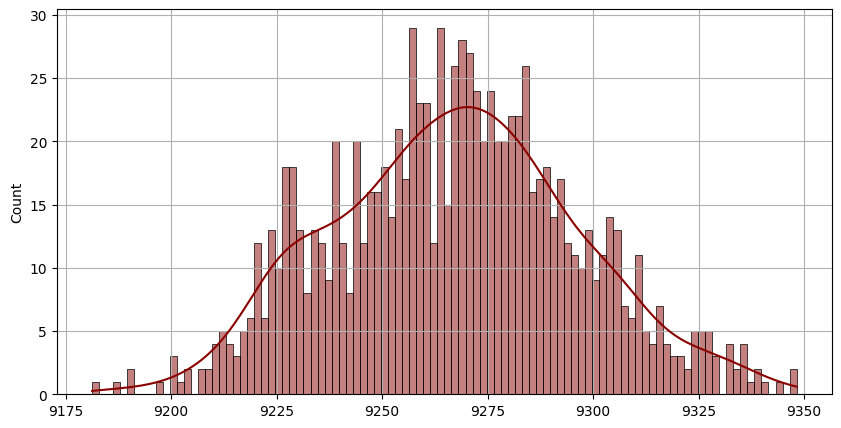

In [ ]:
plt.figure(figsize=(10,5))
plt.grid()
sns.histplot(unmarried_data_msd,kde=True,color="darkred",bins=100)
plt.show()

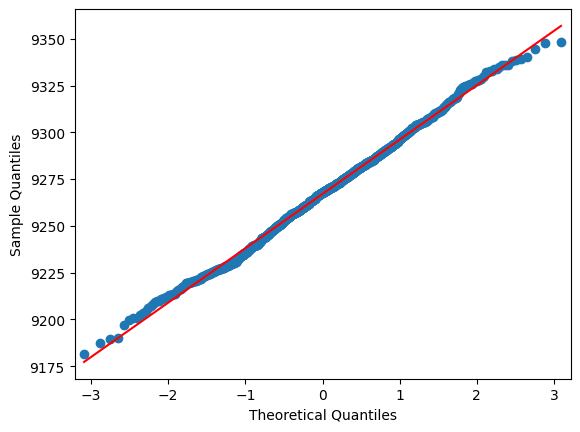

In [ ]:
qqplot(unmarried_data_msd,line="s")
plt.show()

In [ ]:
#calculating mean and standard deviation
[unmarried_data_msd.mean(), unmarried_data_msd.std()]

[9267.085712000002, 29.054403880673203]

In [ ]:
##2.5th percentile and 97.5 percentile
print(np.percentile(unmarried_data_msd,97.5))
print(np.percentile(unmarried_data_msd,2.5))

9325.942409166668
9213.343595


In [ ]:
# 95 % confidence interval as it follows normal distribution
print(np.mean(unmarried_data_msd)+(1.96)*np.std(unmarried_data_msd))
print(np.mean(unmarried_data_msd)-(1.96)*np.std(unmarried_data_msd))

9324.03234360612
9210.139080393883



### i. Confidence Interval Width Comparison
The confidence intervals provided are:
- **Married Data CI:** (9313.49298438488, 9207.972157148448)
- **Unmarried Data CI:** (9324.03234360612, 9210.139080393883)

Firstly, let's compute the widths of these confidence intervals:
- **Width of Married Data CI:** \( 9313.49298438488 - 9207.972157148448 = 105.520827236432 \)
- **Width of Unmarried Data CI:** \( 9324.03234360612 - 9210.139080393883 = 113.893263212237 \)

Since 113.89 > 105.52, the CI for unmarried data is wider.

**Why is this the case?**
The width of a confidence interval depends on the sample standard deviation and the sample size. If the sample sizes are similar, the wider CI for unmarried data may be due to a higher variance in the unmarried data compared to the married data.

### ii. Effect of Sample Size on Confidence Interval Width
The width of a confidence interval is inversely related to the square root of the sample size. Mathematically, the CI width is proportional to \( \frac{\sigma}{\sqrt{n}} \), where \( \sigma \) is the standard deviation and \( n \) is the sample size.

As the sample size increases, the width of the confidence interval decreases. This is because a larger sample size provides more information about the population, reducing the margin of error.

### iii. Overlap of Confidence Intervals for Different Sample Sizes
To determine if the confidence intervals overlap, we need to look at the ranges provided:
- **Married Data CI:** (9207.972157148448, 9313.49298438488)
- **Unmarried Data CI:** (9210.139080393883, 9324.03234360612)

Checking for overlap:
- The lower bound of the unmarried CI (9210.139080393883) is within the range of the married CI (9207.972157148448 to 9313.49298438488).
- The upper bound of the married CI (9313.49298438488) is within the range of the unmarried CI (9210.139080393883 to 9324.03234360612).

Since both intervals share some common values, they do overlap.

### iv. Effect of Sample Size on the Shape of the Distributions of the Means
As the sample size increases:
- The distribution of the sample means becomes more narrowly concentrated around the true population mean, according to the Central Limit Theorem (CLT).
- The shape of the distribution of sample means approaches a normal distribution, regardless of the original population distribution, as long as the sample size is sufficiently large (typically \( n > 30 \)).

In summary, larger sample sizes result in narrower confidence intervals and more precise estimates of the population mean. The distribution of sample means will be less spread out and will more closely resemble a normal distribution.

# Confidence interval of Age

In [ ]:
for i in df1["Age"].unique():
  print(i)

0-17
55+
26-35
46-50
51-55
36-45
18-25


In [ ]:
def confidence_interval_age(data):
  result = {}
  result["Population_mean"] = np.mean(data)
  Age_confidence = confidence_interval(data)
  result["Sample_mean"] = Age_confidence.mean()
  result["Sample_std"] = Age_confidence.std()
  result["Margin_of_error"] = 1.96*Age_confidence.std()/np.sqrt(len(data))
  result["Lower_limit"] = result["Sample_mean"] - result["Margin_of_error"]
  result["Upper_limit"] = result["Sample_mean"] + result["Margin_of_error"]
  result["95%_confidence_interval"] = [result["Lower_limit"],result["Upper_limit"]]
  return result

In [ ]:
res = {}
for i in df1["Age"].unique():
  res[i] = confidence_interval_age(df1[df1["Age"]==i]["Purchase"])
res

{'0-17': {'Population_mean': 8933.464640444974,
  'Sample_mean': 8933.6854552,
  'Sample_std': 28.841277501771078,
  'Margin_of_error': 0.4599952335844371,
  'Lower_limit': 8933.225459966416,
  'Upper_limit': 8934.145450433585,
  '95%_confidence_interval': [8933.225459966416, 8934.145450433585]},
 '55+': {'Population_mean': 9336.280459449405,
  'Sample_mean': 9333.851569966666,
  'Sample_std': 29.41991946726722,
  'Margin_of_error': 0.39322210636991606,
  'Lower_limit': 9333.458347860296,
  'Upper_limit': 9334.244792073036,
  '95%_confidence_interval': [9333.458347860296, 9334.244792073036]},
 '26-35': {'Population_mean': 9252.690632869888,
  'Sample_mean': 9253.166262133334,
  'Sample_std': 29.946600860902517,
  'Margin_of_error': 0.12525650595782672,
  'Lower_limit': 9253.041005627376,
  'Upper_limit': 9253.291518639293,
  '95%_confidence_interval': [9253.041005627376, 9253.291518639293]},
 '46-50': {'Population_mean': 9208.625697468327,
  'Sample_mean': 9208.3460222,
  'Sample_std':

In [ ]:
df2 = pd.DataFrame(res).T
df2

,Population_mean,Sample_mean,Sample_std,Margin_of_error,Lower_limit,Upper_limit,95%_confidence_interval
0-17,8933.46464,8933.685455,28.841278,0.459995,8933.22546,8934.14545,"[8933.225459966416, 8934.145450433585]"
55+,9336.280459,9333.85157,29.419919,0.393222,9333.458348,9334.244792,"[9333.458347860296, 9334.244792073036]"
26-35,9252.690633,9253.166262,29.946601,0.125257,9253.041006,9253.291519,"[9253.041005627376, 9253.291518639293]"
46-50,9208.625697,9208.346022,27.666948,0.253661,9208.092361,9208.599684,"[9208.0923607474, 9208.5996836526]"
51-55,9534.808031,9534.33436,28.930734,0.288988,9534.045372,9534.623348,"[9534.045371897078, 9534.623347502922]"
36-45,9331.350695,9330.392643,29.101116,0.171966,9330.220677,9330.56461,"[9330.220676821576, 9330.564609711757]"
18-25,9169.663606,9169.131503,29.681216,0.18428,9168.947223,9169.315783,"[9168.947223411385, 9169.315782655278]"


# analysis of which age group is spending more!!!! it is 51 to 55 from the below analysis!!!

In [ ]:
spending_max = df2[(df2["Lower_limit"]==df2["Lower_limit"].max()) & (df2["Upper_limit"]==df2["Upper_limit"].max())]
spending_max

,Population_mean,Sample_mean,Sample_std,Margin_of_error,Lower_limit,Upper_limit,95%_confidence_interval
51-55,9534.808031,9534.33436,28.930734,0.288988,9534.045372,9534.623348,"[9534.045371897078, 9534.623347502922]"



### i. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?

1. **Smaller Sample Size:** A smaller sample size results in a larger margin of error.
2. **Higher Variability:** If the data for one gender has higher variability (standard deviation), the confidence interval would be wider.

### ii. How is the width of the confidence interval affected by the sample size?

The width of the confidence interval is inversely proportional to the square root of the sample size. Mathematically, the margin of error \( E \) is given by:

\[ E = Z \frac{\sigma}{\sqrt{n}} \]

where \( Z \) is the Z-score corresponding to the confidence level, \( \sigma \) is the standard deviation, and \( n \) is the sample size.

As the sample size \( n \) increases, the denominator increases, causing the margin of error \( E \) to decrease, thereby narrowing the confidence interval. Conversely, a smaller sample size results in a larger margin of error and a wider confidence interval.

### iii. Do the confidence intervals for different sample sizes overlap?

The provided confidence intervals for different age groups do overlap. For example:
- The confidence interval for the age group `0-17` is [8933.225459966416, 8934.145450433585].
- The confidence interval for the age group `18-25` is [9168.947223411385, 9169.315782655278].

However, these intervals are very close but do not overlap with each other. Comparing each group's intervals would show more overlap or distinct separation. Overlaps indicate that the means of these groups are not significantly different at the given confidence level.

### iv. How does the sample size affect the shape of the distributions of the means?

According to the Central Limit Theorem (CLT), regardless of the shape of the population distribution, the sampling distribution of the sample mean will approach a normal distribution as the sample size increases. This implies:
1. **Smaller Sample Sizes:** The sampling distribution of the sample mean may be skewed or have heavier tails, reflecting the population distribution more closely.
2. **Larger Sample Sizes:** The sampling distribution of the sample mean will be more normally distributed, with reduced skewness and kurtosis, even if the population distribution is not normal.

In summary:
- Larger sample sizes lead to narrower confidence intervals, more precise estimates of the population mean, and a more normal distribution of the sample means.
- Smaller sample sizes lead to wider confidence intervals, less precise estimates, and a sample mean distribution that may more closely reflect the population's actual distribution shape.

Therefore, increasing the sample size results in a more accurate and normally distributed estimation of the population mean.

In [ ]:
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
female_sample = df1[df1["Gender"]=="F"]["Purchase"]

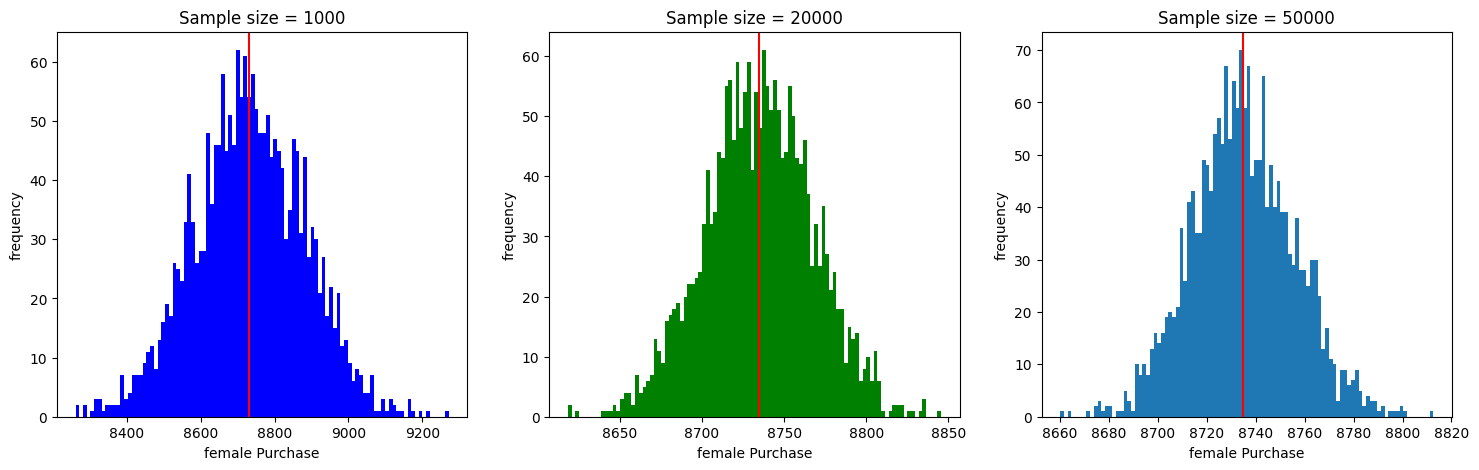

In [ ]:
#with different sample sizes
array1 = []
array2 = []
array3 = []
n = 2000
for i in range(1,n):
 array1.append(female_sample.sample(n=1000,replace= True).mean())
 array2.append(female_sample.sample(n=20000,replace= True).mean())
 array3.append(female_sample.sample(n=50000,replace= True).mean())

fig , (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize=(18,5))

ax1.hist(array1, bins=100,color='b')
ax1.set_xlabel('female Purchase')
ax1.set_ylabel('frequency')
ax1.set_title('Sample size = 1000')
ax1.axvline(x=np.mean(array1),color='r') # for giving mean line

ax2.hist(array2, bins=100, color='g')
ax2.set_xlabel('female Purchase')
ax2.set_ylabel('frequency')
ax2.set_title('Sample size = 20000')
ax2.axvline(x=np.mean(array2),color='r') # for giving mean line

ax3.hist(array3, bins=100)
ax3.set_xlabel('female Purchase')
ax3.set_ylabel('frequency')
ax3.set_title('Sample size = 50000')
ax3.axvline(x=np.mean(array3),color='r') # for giving mean line

The three histograms representing the distribution of female purchase amounts for different sample sizes: 1,000, 20,000, and 50,000. Here are some insights and recommendations based on these distributions:

### Insights

1. **Central Tendency**:
   - The central value (indicated by the red line) remains consistent across all three histograms, suggesting that the mean female purchase amount is stable regardless of the sample size. This central value appears to be around 8,750.

2. **Variability**:
   - As the sample size increases, the histograms become more peaked and less spread out. This indicates that larger sample sizes provide a more precise estimate of the mean purchase amount. The histogram for a sample size of 50,000 shows the least variability around the mean, followed by the histogram for 20,000, and then 1,000.

3. **Distribution Shape**:
   - All three histograms appear to be approximately normally distributed, with a symmetric shape around the mean. This suggests that the female purchase amounts follow a normal distribution.

4. **Frequency**:
   - The frequency of purchases near the mean increases with sample size. For example, in the histogram with a sample size of 50,000, the peak frequency is higher than in the other two histograms. This reinforces the idea that larger samples provide more reliable data.

### Recommendations

1. **Larger Sample Sizes for Precision**:
   - For more accurate and reliable estimates of the mean female purchase amount, it is advisable to use larger sample sizes. A sample size of 50,000 provides a clearer and more precise estimate than smaller sample sizes.

2. **Confidence in Mean Estimates**:
   - Since the mean purchase amount is consistent across different sample sizes, stakeholders can be confident in the stability of this estimate. For reporting and decision-making, the mean value around 8,750 can be used reliably.

3. **Utilize Normal Distribution**:
   - Given the normal distribution of purchase amounts, parametric statistical tests (e.g., t-tests) and confidence interval calculations can be appropriately used for further analysis.

4. **Monitoring Sample Size Effects**:
   - Regularly assess the impact of sample size on variability. If new data collections are planned, consider the trade-offs between sample size, cost, and the desired precision of estimates.

In [ ]:
male_sample = df1[df1["Gender"]=="F"]["Purchase"]

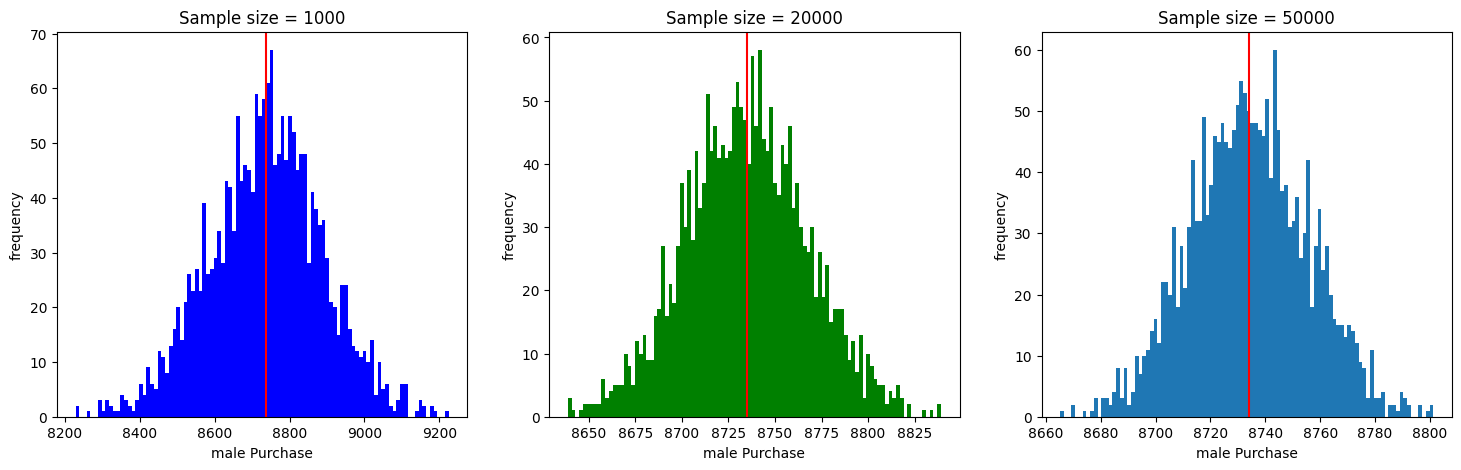

In [ ]:
#with different sample sizes
array1 = []
array2 = []
array3 = []
n = 2000
for i in range(1,n):
 array1.append(male_sample.sample(n=1000,replace= True).mean())
 array2.append(male_sample.sample(n=20000,replace= True).mean())
 array3.append(male_sample.sample(n=50000,replace= True).mean())

fig , (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize=(18,5))

ax1.hist(array1, bins=100,color='b')
ax1.set_xlabel('male Purchase')
ax1.set_ylabel('frequency')
ax1.set_title('Sample size = 1000')
ax1.axvline(x=np.mean(array1),color='r') # for giving mean line

ax2.hist(array2, bins=100, color='g')
ax2.set_xlabel('male Purchase')
ax2.set_ylabel('frequency')
ax2.set_title('Sample size = 20000')
ax2.axvline(x=np.mean(array2),color='r') # for giving mean line

ax3.hist(array3, bins=100)
ax3.set_xlabel('male Purchase')
ax3.set_ylabel('frequency')
ax3.set_title('Sample size = 50000')
ax3.axvline(x=np.mean(array3),color='r') # for giving mean line

The image of histograms of male purchase amounts for three different sample sizes: 1,000, 20,000, and 50,000. Here are some insights and recommendations based on these plots:

### Insights:

1. **Central Tendency:**
   - The red vertical lines represent the mean purchase amount for each sample.
   - As the sample size increases, the mean becomes more stable and representative of the population mean. This is evident as the red line becomes more centered and consistent in the larger samples.

2. **Distribution Shape:**
   - All histograms show a roughly normal distribution, which becomes clearer with larger sample sizes.
   - The histogram with a sample size of 1,000 appears more jagged due to higher variability and fewer data points, whereas the histograms with sample sizes of 20,000 and 50,000 are smoother.

3. **Variability:**
   - Larger sample sizes (20,000 and 50,000) show less variability in the frequency counts, leading to more accurate representations of the underlying distribution.
   - The spread of the data seems to narrow slightly with larger samples, indicating a more precise estimate of the mean purchase amount.

### Recommendations:

1. **Increase Sample Size for Stability:**
   - For more accurate and reliable estimates of male purchase behavior, use larger sample sizes. As shown, a sample size of 20,000 or more provides a stable and smooth distribution, reducing the impact of outliers and variability.

2. **Analyze Larger Samples for Important Decisions:**
   - When making important business decisions, such as setting marketing strategies or predicting future sales, rely on analyses from larger samples to ensure the findings are representative of the entire population.

3. **Check for Normality:**
   - The data appears to be normally distributed. If assuming normality for statistical tests or modeling, larger samples confirm this assumption more robustly.

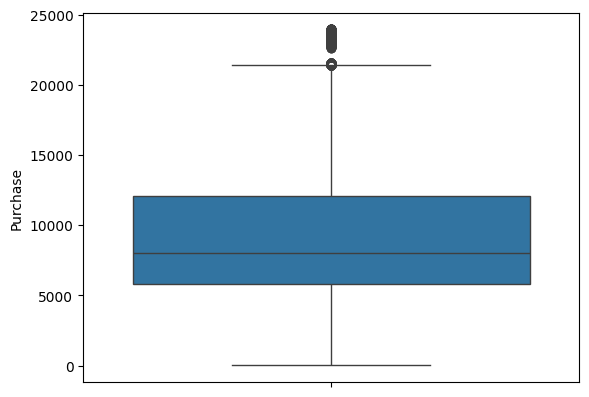

In [ ]:
sns.boxplot(df1["Purchase"])
plt.show()

In [ ]:
purchase_percentile_5 = np.percentile(df1["Purchase"],5)
purchase_percentile_95 = np.percentile(df1["Purchase"],95)

outliers_purchase = df1[(df1["Purchase"]<purchase_percentile_5) | (df1["Purchase"]>purchase_percentile_95)]

stats_of_purchase = outliers_purchase["Purchase"].describe()
stats_of_purchase

count    54954.000000
mean     10734.546512
std       9570.327709
min         12.000000
25%       1415.000000
50%      19337.000000
75%      19703.000000
max      23961.000000
Name: Purchase, dtype: float64

In [ ]:
outliers_purchase.shape

(54954, 10)

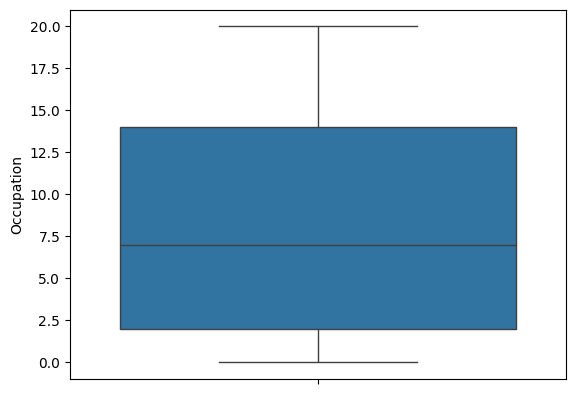

In [ ]:
sns.boxplot(df1["Occupation"])
plt.show()

In [ ]:
occupation_percentile_5 = np.percentile(df1["Occupation"],5)
occupation_percentile_95 = np.percentile(df1["Occupation"],95)

outliers_occupation = df1[(df1["Occupation"]<purchase_percentile_5) | (df1["Occupation"]>purchase_percentile_95)]

stats_of_occupation = outliers_occupation["Occupation"].describe()
stats_of_occupation

count    550068.000000
mean          8.076707
std           6.522660
min           0.000000
25%           2.000000
50%           7.000000
75%          14.000000
max          20.000000
Name: Occupation, dtype: float64

In [ ]:
outliers_occupation.shape

(550068, 10)

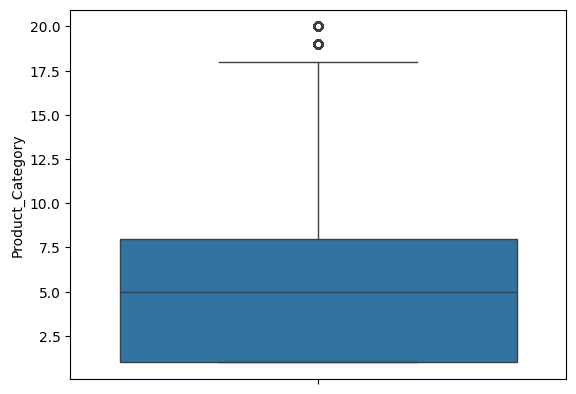

In [ ]:
sns.boxplot(df1["Product_Category"])
plt.show()

In [ ]:
product_percentile_5 = np.percentile(df1["Product_Category"],5)
product_percentile_95 = np.percentile(df1["Product_Category"],95)

outliers_product = df1[(df1["Product_Category"]<purchase_percentile_5) | (df1["Product_Category"]>purchase_percentile_95)]

stats_of_product = outliers_product["Product_Category"].describe()
stats_of_product

count    550068.000000
mean          5.404270
std           3.936211
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category, dtype: float64

In [ ]:
outliers_product.shape

(550068, 10)

# product and age relation

In [ ]:
product_age_relation = df1.groupby(["Age"])["Product_Category"].count().reset_index()
product_age_relation

,Age,Product_Category
0,0-17,15102
1,18-25,99660
2,26-35,219587
3,36-45,110013
4,46-50,45701
5,51-55,38501
6,55+,21504


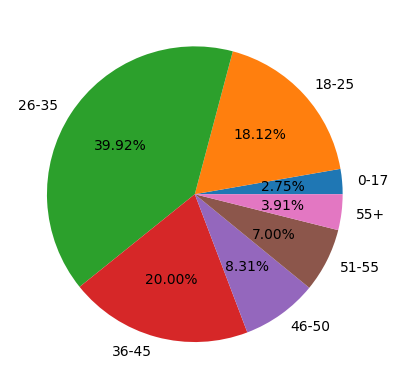

In [ ]:
plt.pie(product_age_relation["Product_Category"],labels=product_age_relation["Age"],autopct="%0.2f%%")
plt.show()

The pie chart represents the distribution of a certain population or dataset across various age groups. Here are the insights and recommendations based on the data:

### Insights

1. **Largest Age Group (26-35)**:
   - The age group 26-35 constitutes the largest segment, making up 39.92% of the total. This indicates that this age range is the most dominant or prevalent in your dataset.

2. **Significant Age Groups**:
   - The next significant age groups are:
     - 36-45 with 20.00%
     - 18-25 with 18.12%
   - Together with the 26-35 group, these three segments make up the majority of the population, indicating a strong presence of individuals aged 18-45.

3. **Smaller Age Groups**:
   - The age groups 46-50, 51-55, and 55+ are relatively smaller:
     - 46-50: 8.31%
     - 51-55: 7.00%
     - 55+: 3.91%
   - The smallest group is 0-17, making up only 2.75%.

### Recommendations

1. **Targeted Marketing and Services for 26-35 Age Group**:
   - Given that the 26-35 age group is the largest, consider tailoring your marketing campaigns, products, and services to cater specifically to their needs and preferences.

2. **Focus on Emerging Adults (18-25)**:
   - With 18.12% representation, the 18-25 age group is significant and likely transitioning into adulthood. Offering products, services, or educational content that resonates with this life stage can be beneficial.

3. **Balance for the 36-45 Age Group**:
   - The 36-45 age group, accounting for 20.00%, also represents a considerable portion. Consider addressing their family-oriented needs and lifestyle.

4. **Opportunities in Smaller Age Segments**:
   - While the age groups 46-50, 51-55, and 55+ are smaller, they should not be overlooked. There may be niche opportunities for specialized products or services, particularly for those aged 55+ who may have specific health or lifestyle needs.

5. **Youth Engagement**:
   - The 0-17 age group is the smallest at 2.75%. If relevant, initiatives to engage younger demographics could be considered, though this group might have limited purchasing power and different engagement needs.

6. **Diverse Strategy Implementation**:
   - Develop a diverse strategy that includes both broad-based campaigns targeting the major age groups (18-45) and niche campaigns for the smaller age segments (46-55+).


# impact of purchase in age and marital status

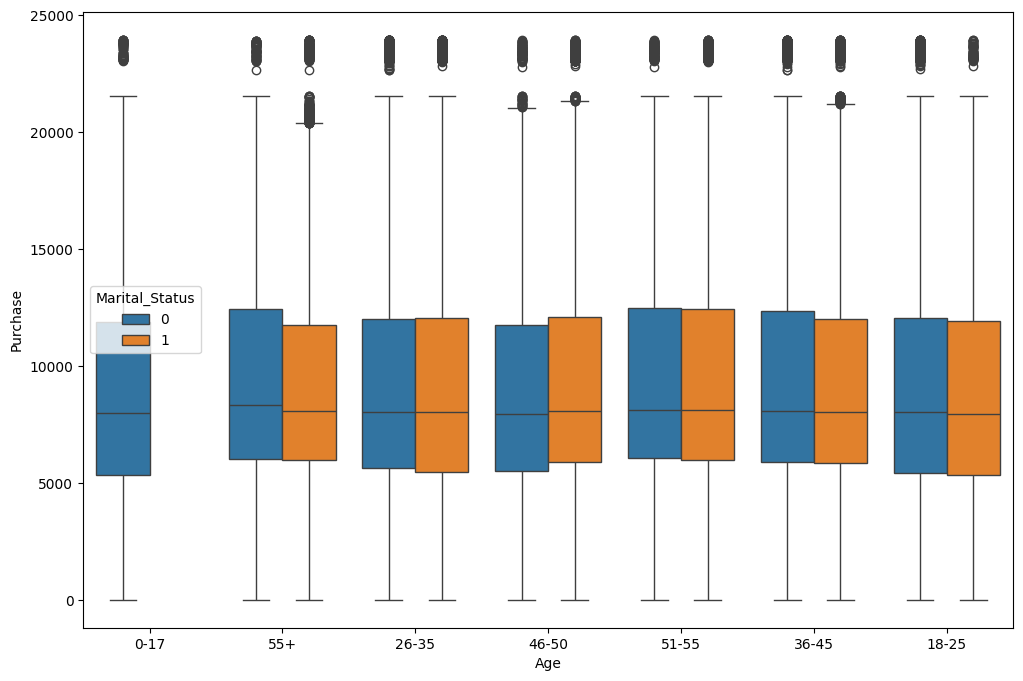

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1, x="Age",y="Purchase",hue="Marital_Status")
plt.show()

The box plot shows the distribution of purchases categorized by age group and marital status. Here are some insights and recommendations based on the data presented:

### Insights:
1. *Age Group 0-17:*
   - Lower purchase amounts overall compared to other age groups.
   - Slightly higher purchases for non-married individuals.

2. *Age Group 18-25:*
   - Purchase amounts are higher than the 0-17 age group but still lower compared to older age groups.
   - The median purchase amount is similar for both married and non-married individuals.

3. *Age Group 26-35:*
   - Both married and non-married individuals have higher purchase amounts compared to the younger age groups.
   - Non-married individuals show a slightly higher median purchase amount.

4. *Age Group 36-45:*
   - Purchase amounts are relatively high for both married and non-married individuals.
   - The median purchase amount is similar for both groups.

5. *Age Group 46-50:*
   - Similar purchase amounts to the 36-45 age group.
   - Married individuals show a slightly higher median purchase amount.

6. *Age Group 51-55:*
   - Purchase amounts are high, with a similar pattern to the 46-50 age group.
   - Non-married individuals have a slightly higher median purchase amount.

7. *Age Group 55+:*
   - The purchase amounts are lower than the 46-55 age groups but still substantial.
   - Non-married individuals have a slightly higher median purchase amount.

### Recommendations:
1. *Targeted Marketing:*
   - *Younger Age Groups (0-25):* Create marketing campaigns that appeal to younger individuals, potentially focusing on discounts and promotions to increase their purchase amounts.
   - *Older Age Groups (26+):* Highlight products that cater to older age groups' preferences and needs, as they tend to have higher purchase amounts.

2. *Marital Status Consideration:*
   - Develop marketing strategies that specifically target non-married individuals in the 26-35 and 55+ age groups, as they tend to have slightly higher purchase amounts.
   - For married individuals, emphasize family-oriented products and promotions.

3. *Product Segmentation:*
   - Customize product offerings based on age group preferences. For example, technology and entertainment products might appeal more to younger age groups, while home improvement and luxury items may attract older individuals.

4. *Customer Engagement:*
   - Engage with younger customers through social media and digital platforms to increase brand loyalty and encourage higher purchase amounts.
   - For older customers, consider traditional marketing methods and personalized customer service to enhance their shopping experience.

# Are there preferred product categories for different genders? numerical data:)

In [ ]:
from itertools import product
product_gender_relation = df1.groupby(["Gender","Product_Category"]).size().reset_index()
product_gender_relation

,Gender,Product_Category,0
0,F,1,24831
1,F,2,5658
2,F,3,6006
3,F,4,3639
4,F,5,41961
5,F,6,4559
6,F,7,943
7,F,8,33558
8,F,9,70
9,F,10,1162


# Are there preferred product categories for different genders? plot:)

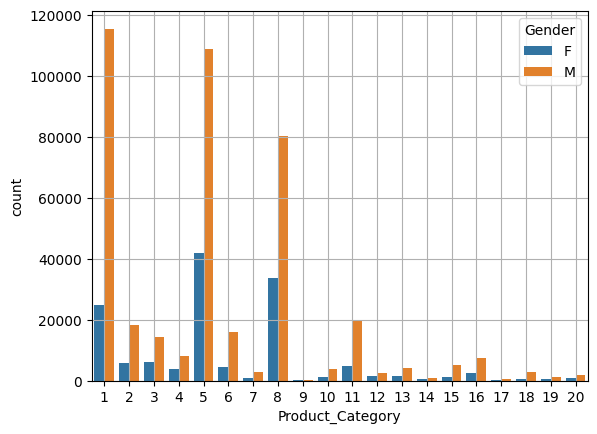

In [ ]:
sns.countplot(data=df1,x="Product_Category",hue="Gender")
plt.grid()
plt.show()

The bar chart displays the count of purchases across different product categories, segmented by age groups. Here are some insights and recommendations based on the data presented:

### Insights:
1. *Product Category 1:*
   - Highest purchase count among age groups 26-35 and 36-45.
   - Significant purchases also observed in the 18-25 and 46-50 age groups.

2. *Product Category 5:*
   - Dominated by age group 26-35, with a substantial count also from the 18-25 and 36-45 age groups.
   - Noticeable participation from the 46-50 and 51-55 age groups.

3. *Product Category 8:*
   - Similar distribution to category 5, with the highest count from age group 26-35, followed by 18-25 and 36-45.
   - Lesser but notable purchases from the 46-50 and 51-55 age groups.

4. *Other Product Categories:*
   - Categories like 2, 3, 4, 6, 11, and others show a diverse spread across all age groups, with no single age group dominating.
   - Some categories have very low counts across all age groups (e.g., categories 10, 12-20).

### Recommendations:
1. *Product Category Focus:*
   - *Categories 1, 5, and 8:* Focus marketing and inventory efforts on these categories, as they have the highest purchase counts across multiple age groups. Tailor promotions and discounts to further increase engagement.
   - *Diverse Categories:* Ensure a good stock of products in categories 2, 3, 4, 6, and 11, as they appeal to a broad age range.

2. *Age Group Targeting:*
   - *26-35 Age Group:* This group shows the highest purchase counts in multiple categories. Develop targeted marketing campaigns, personalized offers, and loyalty programs to retain and attract more customers from this demographic.
   - *18-25 and 36-45 Age Groups:* These groups also show significant purchase activity. Use social media and digital marketing to engage with the 18-25 group, while employing a mix of digital and traditional marketing for the 36-45 group.

3. *Product Category Enhancement:*
   - *Low Count Categories (10, 12-20):* Investigate the reasons behind the low purchase counts. Consider enhancing product offerings, improving visibility, and running promotional campaigns to boost interest in these categories.

4. *Promotional Strategies:*
   - *Seasonal Sales and Discounts:* Implement age-specific promotions during peak shopping seasons, such as back-to-school sales for younger age groups and holiday sales for all age groups.
   - *Bundle Offers:* Create bundle deals that combine popular products from categories 1, 5, and 8 with items from lower-count categories to increase overall sales.

# What products are different age groups buying?

In [ ]:
product_age_relation = df1.groupby(["Age","Product_Category"]).size().reset_index()
product_age_relation.rename(columns={0:"count"},inplace=True)
product_age_relation

,Age,Product_Category,count
0,0-17,1,3585
1,0-17,2,805
2,0-17,3,1200
3,0-17,4,758
4,0-17,5,4330
...,...,...,...
135,55+,16,377
136,55+,17,67
137,55+,18,241
138,55+,19,103


# What products are different age groups buying?

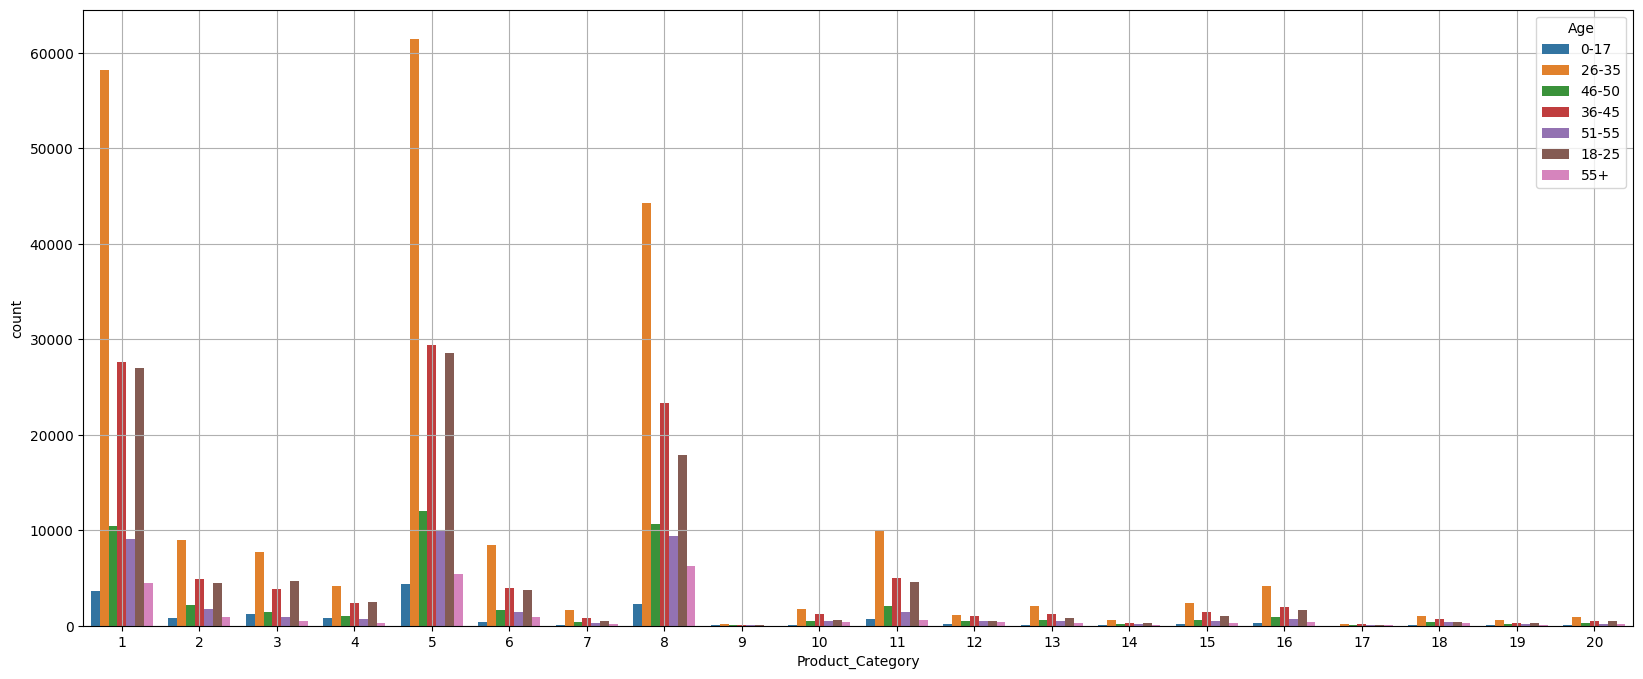

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=df1,hue="Age",x="Product_Category")
plt.grid()
plt.show()

The bar chart displays the count of purchases across different product categories, segmented by age groups. Here are some insights and recommendations based on the data presented:

### Insights:
1. *Product Category 1:*
   - Highest purchase count among age groups 26-35 and 36-45.
   - Significant purchases also observed in the 18-25 and 46-50 age groups.

2. *Product Category 5:*
   - Dominated by age group 26-35, with a substantial count also from the 18-25 and 36-45 age groups.
   - Noticeable participation from the 46-50 and 51-55 age groups.

3. *Product Category 8:*
   - Similar distribution to category 5, with the highest count from age group 26-35, followed by 18-25 and 36-45.
   - Lesser but notable purchases from the 46-50 and 51-55 age groups.

4. *Other Product Categories:*
   - Categories like 2, 3, 4, 6, 11, and others show a diverse spread across all age groups, with no single age group dominating.
   - Some categories have very low counts across all age groups (e.g., categories 10, 12-20).

### Recommendations:
1. *Product Category Focus:*
   - *Categories 1, 5, and 8:* Focus marketing and inventory efforts on these categories, as they have the highest purchase counts across multiple age groups. Tailor promotions and discounts to further increase engagement.
   - *Diverse Categories:* Ensure a good stock of products in categories 2, 3, 4, 6, and 11, as they appeal to a broad age range.

2. *Age Group Targeting:*
   - *26-35 Age Group:* This group shows the highest purchase counts in multiple categories. Develop targeted marketing campaigns, personalized offers, and loyalty programs to retain and attract more customers from this demographic.
   - *18-25 and 36-45 Age Groups:* These groups also show significant purchase activity. Use social media and digital marketing to engage with the 18-25 group, while employing a mix of digital and traditional marketing for the 36-45 group.

3. *Product Category Enhancement:*
   - *Low Count Categories (10, 12-20):* Investigate the reasons behind the low purchase counts. Consider enhancing product offerings, improving visibility, and running promotional campaigns to boost interest in these categories.

4. *Promotional Strategies:*
   - *Seasonal Sales and Discounts:* Implement age-specific promotions during peak shopping seasons, such as back-to-school sales for younger age groups and holiday sales for all age groups.
   - *Bundle Offers:* Create bundle deals that combine popular products from categories 1, 5, and 8 with items from lower-count categories to increase overall sales.

5. *Customer Engagement:*
   - *Feedback and Reviews:* Encourage customers to provide feedback and reviews, particularly for lower-count categories, to understand preferences and improve product offerings.
   - *Personalization:* Use data analytics to personalize shopping experiences and recommendations based on customers' age and purchasing history.